# Линейная алгебра: сходство текстов и аппроксимация функций

1-2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().

In [189]:
# Open source file
file_obj = open('_sentences.txt', 'r')
src_lines = file_obj.readlines()
file_obj.close()

# List of strings with lower symols without '\n'
sentences = [line.rstrip().lower() for line in src_lines]

print type(sentences)
print len(sentences)

<type 'list'>
22


3. Произведите токенизацию, то есть разбиение текстов на слова. 
Для этого можно воспользоваться регулярным выражением, 
которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). 
Не забудьте удалить пустые слова после разделения.

In [190]:
import re
sentencesWithWords = [re.split('[^a-z]', sentence) for sentence in sentences]

# Create merge list of sentences with words in one list
def merge(lst, res=[]):
  for el in lst:
    merge(el) if isinstance(el, list) else res.append(el)
  return res

listOfWords = merge(word for word in sentencesWithWords)
# Prepare list of unique words                 
uniqueWords = set(listOfWords)
uniqueWords.remove('')
uniqueWords = list(uniqueWords)

4. Составьте список всех слов, встречающихся в предложениях. 
Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. 
Для этого удобно воспользоваться структурой dict.

In [191]:
# dictionary {"word" : "index"}
wordsDict = {}
index = 0
for word in uniqueWords:
    wordsDict[word] = index
    index = index+1
    
print wordsDict



{'osx': 0, 'selection': 1, 'safari': 2, 'just': 3, 'developed': 4, 'over': 5, 'vermin': 6, 'domestic': 7, 'major': 110, 'installed': 9, 'symbols': 10, 'through': 11, 'human': 12, 'world': 13, 'disk': 14, 'its': 15, 'fifth': 16, 'apple': 113, 'tamed': 18, 'upgrade': 19, 'lb': 20, 'computers': 179, 'to': 22, 'version': 69, 'deliberately': 24, 'marks': 25, 'has': 26, 'arguments': 210, 'predecessor': 27, 'non': 28, 'adjacent': 211, 'read': 30, 'made': 163, 'every': 32, 'they': 34, 'not': 35, 'during': 36, 'now': 37, 'organisms': 236, 'people': 131, 'possess': 38, 'intel': 39, 'keyboards': 40, 'command': 246, 'bytes': 41, 'unnecessary': 42, 'patch': 43, 'common': 76, 'release': 83, 'output': 46, 'entirely': 47, 'where': 48, 'stdin': 240, 'ears': 49, 'concatenate': 77, 'right': 119, 'often': 52, 'wrong': 226, 'sequence': 53, 'some': 54, 'lion': 55, 'frequency': 56, 'are': 57, 'year': 58, 'download': 59, 'terms': 60, 'firmware': 205, 'concern': 61, 'for': 63, 'pipes': 64, 'since': 65, 'factor

5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [192]:
import numpy as np

matrix = np.zeros((len(sentences), len(wordsDict)))

print matrix.shape

sentence_index = 0;
for sentence in sentencesWithWords:
    for word in wordsDict.keys() :
        # 
        if word in sentence : 
            #print "found word: " + word + ' value|index: ' + str(wordsDict[word])
            #print sentence
            #print "sentence: " + str(sentence_index) + ' found: ' + word
            matrix[sentence_index, wordsDict[word]] = matrix[sentence_index, wordsDict[word]] +1
    sentence_index = sentence_index + 1
#
resMatrix = np.arange(22, dtype=float)

from scipy.spatial import distance

for index in range(0, len(sentences)):    
    #result[index] = distance.cosine (matrix[0], matrix[index])
    mydistance =  distance.cosine (matrix[0], matrix[index])
    print mydistance
    resMatrix[index] = mydistance

print resMatrix

(22, 254)
0.0
0.9402385695332803
0.8619868881315291
0.8885443574849294
0.8055388829343507
0.9351796276447836
0.7547442642060137
0.9154845745271484
0.9069515789601529
0.8833576312960392
0.8703592552895671
0.8703592552895671
0.8773721321030068
0.8703592552895671
0.8619868881315291
0.9402385695332803
0.85361498905772
0.9503708333014534
0.9442721787424647
0.9402385695332803
0.8427572744917122
0.8250364469440588
[0.         0.94023857 0.86198689 0.88854436 0.80553888 0.93517963
 0.75474426 0.91548457 0.90695158 0.88335763 0.87035926 0.87035926
 0.87737213 0.87035926 0.86198689 0.94023857 0.85361499 0.95037083
 0.94427218 0.94023857 0.84275727 0.82503645]


In [193]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

nearest = find_nearest(resMatrix[1:], 0)
print nearest

0.7547442642060137


Берем многочлен первой степени w0 + w1*x = y
Подставляем в него x (1 и 5) и y (вычисляем f от x)

В точке 1 получаем: w0 + w1 * 1 = sin(1/5) * exp(1/10) + 5*exp(-1/2)
В точке 15 получаем: w0 + w1 * 15 = sin(15/5) * exp(15/10) + 5*exp(-15/2)

Коэффициенты для первого случая:
    при  w0 = 1, при w1 = 1 
    при  w0 = 1, при w1 = 15

3.252216865271419
1.7468459495903677
2.5054164070002463
0.6352214195786656
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]
[ True  True False False]
[ 1.    1.01  1.02 ... 14.97 14.98 14.99]


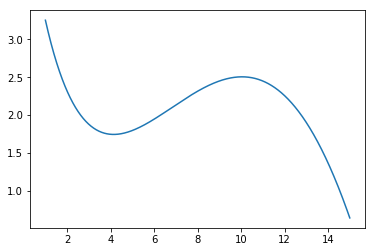

In [216]:
 %matplotlib inline
import scipy as sp
import math as math

# Function to aproximate
def func (x):
    """
    np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)
    """
    return np.sin(x/5.)*np.exp(x/10.) + 5.*np.exp(-x/2.)

f1 = func(1.)
print f1
f4 = func(4.)
print f4
f10 = func(10.)
print f10
f15 = func(15.)
print f15

a = np.array([[1., 1., 1., 1.],
              [1., 4., 4.**2, 4.**3],
              [1., 10., 10.**2, 10.**3],
              [1., 15., 15**2, 15.**3]])
print a
b = np.array([f1, f4, f10, f15])

x = sp.linalg.solve(a,b)
print x

print np.dot(a,x) == b

import matplotlib.pyplot as plt

# Интервал изменения переменной по оси X
xmin = 1.0
xmax = 15.0

# Шаг между точками
dx = 0.01
# !!! Создадим список координат по оси X на отрезке [-xmin; xmax], включая концы
xlist = np.arange (xmin, xmax, dx)
print xlist
# Вычислим значение функции в заданных точках
ylist = [func (x) for x in xlist]
#print ylist
# !!! Нарисуем одномерный график
plt.plot (xlist, ylist)

# !!! Покажем окно с нарисованным графиком
plt.show()